# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.10.0-alpha.refactor.291'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **14th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Holy See'],
 5: ['Fiji', 'Tanzania', 'Liechtenstein'],
 6: ['Slovenia', 'Brunei', 'Grenada', 'Papua New Guinea'],
 7: ['Croatia', 'Andorra', 'Saint Lucia', 'Central African Republic', 'Ireland',
     'Jordan', 'Antigua and Barbuda', 'Tunisia', 'Georgia', 'Myanmar',
     'Czech Republic', 'Cambodia', 'Slovakia', 'Switzerland', 'Angola',
     'Lithuania', 'Sri Lanka', 'Botswana', 'Monaco', 'Poland'],
 8: ['Malaysia', 'Eritrea', 'Nicaragua', 'Saint Vincent and the Grenadines',
     'Dominica', 'Equatorial Guinea', 'Cameroon', 'Spain', 'Yemen', 'Iceland',
     'Hungary', 'Seychelles', 'Sao Tome and Principe', 'Cyprus', 'Madagascar',
     'Mongolia', 'Guinea-Bissau'],
 9: ['Malawi', 'Rwanda', 'Gambia', 'Burkina Faso', 'Zambia', 'Tajikistan',
     'Jamaica', 'Zimbabwe', 'Nepal', 'Romania', 'Malta', 'Trinidad and Tobago',
     'Djibouti', 'Kazakhstan', 'Burundi', 'Israel', 'South Sudan', 'Portugal'],
 10: ['Niger', 'Chile', 'Ecuador', 'Comoros', 'Namibia', 'Australia', 'Austria',
      

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=14)
# The number of countries
len(analyser.countries)

7

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{14: ['Honduras', 'Somalia', 'France', 'Latvia', 'Russia'],
 15: ['Egypt', 'Belarus']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Egypt   0th    Past  28Feb2020  02May2020    98423595
        1st    Past  03May2020  17May2020    98423595
        2nd    Past  18May2020  28May2020    98423595
        3rd    Past  29May2020  07Jun2020    98423595
        4th    Past  08Jun2020  17Jun2020    98423595
        5th    Past  18Jun2020  27Jun2020    98423595
        6th    Past  28Jun2020  06Jul2020    98423595
        7th    Past  07Jul2020  16Jul2020    98423595
        8th    Past  17Jul2020  22Jul2020    98423595
        9th    Past  23Jul2020  28Jul2020    98423595
        10th   Past  29Jul2020  11Aug2020    98423595
        11th   Past  12Aug2020  27Aug2020    98423595
        12th   Past  28Aug2020  12Sep2020    98423595
        13th   Past  13Sep2020  04Oct2020    98423595
        14th   Past  05Oct2020  05Nov2020    98423595
Belarus 0th    Past  09Mar2020  26Apr2020     9483499
        1st    Past  27Apr2020  08May2020     9483499
        2nd    Past  09May2020  16May2020     9483499
        3rd    Past  17May2020  23May2020     9483499
        4th    Past  24May2020  30May2020     9483499
        5th    Past  31May2020  06Jun2020     9483499
        6th    Past  07Jun2020  13Jun2020     9483499
        7th    Past  14Jun2020  20Jun2020     9483499
        8th    Past  21Jun2020  03Jul2020     9483499
        9th    Past  04Jul2020  30Jul2020     9483499
        10th   Past  31Jul2020  07Sep2020     9483499
        11th   Past  08Sep2020  02Oct2020     9483499
        12th   Past  03Oct2020  16Oct2020     9483499
        13th   Past  17Oct2020  25Oct2020     9483499
        14th   Past  26Oct2020  05Nov2020     9483499

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	HND,  7th phase (31Aug2020 - 11Sep2020): finished 1310 trials in 1 min  0 sec

	RUS,  4th phase (13Jun2020 - 26Jun2020): finished 1343 trials in 1 min  0 sec

	HND, 12th phase (18Oct2020 - 25Oct2020): finished 1322 trials in 1 min  0 sec

	EGY,  4th phase (08Jun2020 - 17Jun2020): finished 1331 trials in 1 min  0 sec

	BLR,  8th phase (21Jun2020 - 03Jul2020): finished  959 trials in 0 min 40 sec

	HND,  3rd phase (15Jul2020 - 24Jul2020): finished  405 trials in 0 min 15 sec

	EGY,  1st phase (03May2020 - 17May2020): finished 1319 trials in 1 min  0 sec

	FRA,  1st phase (30Mar2020 - 09Apr2020): finished 1348 trials in 1 min  0 sec

	SOM,  5th phase (05Jun2020 - 10Jun2020): finished 1358 trials in 1 min  0 sec

	FRA, 10th phase (02Oct2020 - 08Oct2020): finished  531 trials in 0 min 20 sec

	SOM,  6th phase (11Jun2020 - 16Jun2020): finished 1038 trials in 0 min 45 sec

	BLR,  4th phase (24May2020 - 30May2020): finished  703 trials in 0 min 30 sec

	HND,  0th phase (28Mar2020 - 13Jun2020): finished 1254 trials in 1 min  0 sec

	HND,  4th phase (25Jul2020 - 05Aug2020): finished 1320 trials in 1 min  0 sec

	FRA, 11th phase (09Oct2020 - 16Oct2020): finished  552 trials in 0 min 20 sec

	FRA,  7th phase (11Sep2020 - 18Sep2020): finished  559 trials in 0 min 20 sec

	RUS,  1st phase (04May2020 - 17May2020): finished 1430 trials in 1 min  0 sec

	RUS,  9th phase (06Sep2020 - 25Sep2020): finished 1452 trials in 1 min  0 sec

	FRA,  8th phase (19Sep2020 - 24Sep2020): finished  192 trials in 0 min  5 sec

	LVA, 10th phase (18Sep2020 - 25Sep2020): finished 1729 trials in 1 min  0 sec

	SOM,  7th phase (17Jun2020 - 03Jul2020): finished 1310 trials in 0 min 50 sec

	HND,  1st phase (14Jun2020 - 29Jun2020): finished  594 trials in 0 min 20 sec

	HND,  5th phase (06Aug2020 - 20Aug2020): finished  577 trials in 0 min 20 sec

	LVA,  3rd phase (28Apr2020 - 06May2020): finished 1721 trials in 1 min  0 sec

	HND,  8th phase (12Sep2020 - 20Sep2020): finished  352 trials in 0 min 10 sec

	RUS,  6th phase (12Jul2020 - 26Jul2020): finished 1502 trials in 1 min  0 sec

	BLR,  6th phase (07Jun2020 - 13Jun2020): finished 1517 trials in 1 min  0 sec

	EGY, 12th phase (28Aug2020 - 12Sep2020): finished  422 trials in 0 min 15 sec

	FRA,  2nd phase (10Apr2020 - 25Apr2020): finished 1389 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 06Apr2020): finished 1653 trials in 1 min  0 sec

	BLR, 12th phase (03Oct2020 - 16Oct2020): finished  291 trials in 0 min 10 sec

	FRA,  9th phase (25Sep2020 - 01Oct2020): finished  424 trials in 0 min 15 sec

	SOM, 13th phase (24Oct2020 - 05Nov2020): finished 1833 trials in 1 min  0 sec

	EGY,  5th phase (18Jun2020 - 27Jun2020): finished  169 trials in 0 min  5 sec

	SOM,  0th phase (31Mar2020 - 03May2020): finished 1315 trials in 1 min  0 sec

	RUS,  7th phase (27Jul2020 - 14Aug2020): finished 1221 trials in 1 min  0 sec

	LVA,  7th phase (09Jul2020 - 05Aug2020): finished 1434 trials in 1 min  0 sec

	EGY,  2nd phase (18May2020 - 28May2020): finished 1263 trials in 1 min  0 sec

	HND,  9th phase (21Sep2020 - 29Sep2020): finished  416 trials in 0 min 15 sec

	SOM,  1st phase (04May2020 - 13May2020): finished 1232 trials in 1 min  0 sec

	BLR,  9th phase (04Jul2020 - 30Jul2020): finished  370 trials in 0 min 15 sec

	EGY, 10th phase (29Jul2020 - 11Aug2020): finished  521 trials in 0 min 20 sec

	RUS,  5th phase (27Jun2020 - 11Jul2020): finished 1266 trials in 1 min  0 sec

	FRA, 12th phase (17Oct2020 - 23Oct2020): finished 1288 trials in 1 min  0 sec

	LVA,  5th phase (16May2020 - 31May2020): finished 1559 trials in 1 min  0 sec

	HND, 10th phase (30Sep2020 - 08Oct2020): finished  430 trials in 0 min 15 sec

	BLR,  1st phase (27Apr2020 - 08May2020): finished 1338 trials in 1 min  0 sec

	SOM,  8th phase (04Jul2020 - 20Jul2020): finished 1439 trials in 1 min  0 sec

	LVA,  4th phase (07May2020 - 15May2020): finished 1665 trials in 1 min  0 sec

	FRA,  4th phase (18Jun2020 - 12Aug2020): finished 1424 trials in 1 min  0 sec

	HND, 11th phase (09Oct2020 - 17Oct2020): finished 1326 trials in 0 min 50 sec

	BLR,  3rd phase (17May2020 - 23May2020): finished  679 trials in 0 min 30 sec

	LVA,  9th phase (29Aug2020 - 17Sep2020): finished 1589 trials in 1 min  0 sec

	EGY,  8th phase (17Jul2020 - 22Jul2020): finished  128 trials in 0 min  5 sec

	SOM,  9th phase (21Jul2020 - 24Aug2020): finished 1146 trials in 1 min  0 sec

	LVA,  1st phase (07Apr2020 - 20Apr2020): finished 1332 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 29Mar2020): finished 1055 trials in 1 min  0 sec

	RUS,  3rd phase (31May2020 - 12Jun2020): finished 1133 trials in 1 min  1 sec

	EGY,  7th phase (07Jul2020 - 16Jul2020): finished  168 trials in 0 min  5 sec

	RUS,  0th phase (12Feb2020 - 03May2020): finished 1203 trials in 1 min  0 sec

	SOM, 10th phase (25Aug2020 - 19Sep2020): finished 1371 trials in 1 min  0 sec

	EGY, 13th phase (13Sep2020 - 04Oct2020): finished  329 trials in 0 min 15 sec

	BLR, 11th phase (08Sep2020 - 02Oct2020): finished 1221 trials in 1 min  1 sec

	FRA,  3rd phase (26Apr2020 - 17Jun2020): finished 1162 trials in 1 min  0 sec

	EGY,  9th phase (23Jul2020 - 28Jul2020): finished  509 trials in 0 min 15 sec

	LVA,  2nd phase (21Apr2020 - 27Apr2020): finished 1449 trials in 1 min  0 sec

	SOM,  4th phase (30May2020 - 04Jun2020): finished 1330 trials in 1 min  0 sec

	EGY, 11th phase (12Aug2020 - 27Aug2020): finished  145 trials in 0 min  5 sec

	BLR,  2nd phase (09May2020 - 16May2020): finished 1336 trials in 1 min  0 sec

	LVA, 12th phase (12Oct2020 - 23Oct2020): finished 1421 trials in 1 min  0 sec

	EGY, 14th phase (05Oct2020 - 05Nov2020): finished 1213 trials in 1 min  0 sec

	HND,  6th phase (21Aug2020 - 30Aug2020): finished 1310 trials in 1 min  0 sec

	BLR, 10th phase (31Jul2020 - 07Sep2020): finished 1287 trials in 1 min  0 sec

	HND,  2nd phase (30Jun2020 - 14Jul2020): finished 1341 trials in 1 min  0 sec

	SOM, 11th phase (20Sep2020 - 30Sep2020): finished 1803 trials in 1 min  0 sec

	FRA,  5th phase (13Aug2020 - 31Aug2020): finished  755 trials in 0 min 35 sec

	BLR,  0th phase (09Mar2020 - 26Apr2020): finished 1171 trials in 1 min  0 sec

	SOM, 12th phase (01Oct2020 - 23Oct2020): finished 1622 trials in 1 min  0 sec

	RUS,  8th phase (15Aug2020 - 05Sep2020): finished 1198 trials in 1 min  0 sec

	BLR,  7th phase (14Jun2020 - 20Jun2020): finished  543 trials in 0 min 20 sec

	FRA,  6th phase (01Sep2020 - 10Sep2020): finished 1085 trials in 0 min 45 sec

	EGY,  6th phase (28Jun2020 - 06Jul2020): finished 1360 trials in 1 min  0 sec

	HND, 13th phase (26Oct2020 - 05Nov2020): finished 1355 trials in 1 min  0 sec

	RUS, 10th phase (26Sep2020 - 08Oct2020): finished 1316 trials in 1 min  0 sec

	SOM,  2nd phase (14May2020 - 20May2020): finished 1344 trials in 1 min  0 sec

	EGY,  0th phase (28Feb2020 - 02May2020): finished 1331 trials in 1 min  0 sec

	LVA, 11th phase (26Sep2020 - 11Oct2020): finished 1545 trials in 1 min  0 sec

	EGY,  3rd phase (29May2020 - 07Jun2020): finished 1378 trials in 1 min  0 sec

	BLR, 13th phase (17Oct2020 - 25Oct2020): finished 1333 trials in 1 min  0 sec

	BLR,  5th phase (31May2020 - 06Jun2020): finished 1301 trials in 1 min  0 sec

	LVA,  8th phase (06Aug2020 - 28Aug2020): finished 1480 trials in 1 min  0 sec

	RUS,  2nd phase (18May2020 - 30May2020): finished 1399 trials in 1 min  0 sec

	LVA,  6th phase (01Jun2020 - 08Jul2020): finished 1478 trials in 1 min  0 sec

	SOM,  3rd phase (21May2020 - 29May2020): finished 1580 trials in 1 min  0 sec

Completed optimization. Total: 21 min 10 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Egypt   0th    Past  28Feb2020  02May2020    98423595  SIR-F  0.02   
        1st    Past  03May2020  17May2020    98423595  SIR-F  3.68   
        2nd    Past  18May2020  28May2020    98423595  SIR-F  3.34   
        3rd    Past  29May2020  07Jun2020    98423595  SIR-F  3.19   
        4th    Past  08Jun2020  17Jun2020    98423595  SIR-F  3.54   
        5th    Past  18Jun2020  27Jun2020    98423595  SIR-F  3.46   
        6th    Past  28Jun2020  06Jul2020    98423595  SIR-F  2.96   
        7th    Past  07Jul2020  16Jul2020    98423595  SIR-F  1.53   
        8th    Past  17Jul2020  22Jul2020    98423595  SIR-F  1.13   
        9th    Past  23Jul2020  28Jul2020    98423595  SIR-F  0.46   
        10th   Past  29Jul2020  11Aug2020    98423595  SIR-F  0.12   
        11th   Past  12Aug2020  27Aug2020    98423595  SIR-F  0.17   
        12th   Past  28Aug2020  12Sep2020    98423595  SIR-F  0.16   
        13th   Past  13Sep2020  04Oct2020    98423595  SIR-F  0.26   
        14th   Past  05Oct2020  05Nov2020    98423595  SIR-F  1.91   
Belarus 0th    Past  09Mar2020  26Apr2020     9483499  SIR-F   8.9   
        1st    Past  27Apr2020  08May2020     9483499  SIR-F  2.22   
        2nd    Past  09May2020  16May2020     9483499  SIR-F  1.98   
        3rd    Past  17May2020  23May2020     9483499  SIR-F  1.46   
        4th    Past  24May2020  30May2020     9483499  SIR-F  1.41   
        5th    Past  31May2020  06Jun2020     9483499  SIR-F  1.06   
        6th    Past  07Jun2020  13Jun2020     9483499  SIR-F  0.94   
        7th    Past  14Jun2020  20Jun2020     9483499  SIR-F  0.55   
        8th    Past  21Jun2020  03Jul2020     9483499  SIR-F  0.34   
        9th    Past  04Jul2020  30Jul2020     9483499  SIR-F  0.32   
        10th   Past  31Jul2020  07Sep2020     9483499  SIR-F  0.47   
        11th   Past  08Sep2020  02Oct2020     9483499  SIR-F  2.27   
        12th   Past  03Oct2020  16Oct2020     9483499  SIR-F  1.93   
        13th   Past  17Oct2020  25Oct2020     9483499  SIR-F  1.58   
        14th   Past  26Oct2020  05Nov2020     9483499      -     -   

                     theta        kappa          rho       sigma  tau  \
Country Phase                                                           
Egypt   0th       0.602763     0.544883    0.0250943  0.00469834  360   
        1st      0.0010023  0.000556525    0.0168803   0.0040237  360   
        2nd      0.0212514  4.82449e-05    0.0187634  0.00544255  360   
        3rd    0.000138688  0.000552044    0.0172512  0.00484903  360   
        4th      0.0208727  0.000194436    0.0131172  0.00343021  360   
        5th      0.0466065  7.90662e-05   0.00960975   0.0025658  360   
        6th    0.000966774  0.000409638   0.00770113  0.00219251  360   
        7th      0.0492292  0.000150335   0.00440939  0.00259542  360   
        8th      0.0418393  5.43309e-05   0.00299679  0.00247625  360   
        9th      0.0679342  4.57931e-05   0.00226546   0.0045905  360   
        10th     0.0222383    0.0001102  0.000984113  0.00808549  360   
        11th     0.0286951  6.72851e-05   0.00134521  0.00755102  360   
        12th     0.0270891  0.000167965   0.00226738   0.0138463  360   
        13th     0.0415288  0.000553023     0.014244   0.0526372  360   
        14th     0.0755866  0.000318364     0.034473   0.0163354  360   
Belarus 0th     0.00035874  0.000401838    0.0453276  0.00469093  360   
        1st    0.000822581  8.45325e-05    0.0183336  0.00815694  360   
        2nd     0.00499772   1.8817e-06    0.0130611  0.00657461  360   
        3rd    0.000165543    5.962e-05    0.0112616  0.00763706  360   
        4th     0.00143251  3.62852e-05   0.00996331  0.00703568  360   
        5th    0.000267151  7.58056e-05   0.00878082  0.00816886  360   
        6th    0.000164226  5.69843e-05   0.00779032  0.00821349  360   
        7th    0.00036

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-28,Egypt,0.602763,0.544883,0.0250943,0.00469834,0.603,0,9,53,...,0,0,0,0,0,0,0,1,2,0.0
1,2020-02-29,Egypt,0.602763,0.544883,0.0250943,0.00469834,0.603,0,9,53,...,0,0,0,0,0,0,0,1,2,0.0
2,2020-03-01,Egypt,0.602763,0.544883,0.0250943,0.00469834,0.603,0,9,53,...,0,0,0,0,0,0,0,1,2,0.0
3,2020-03-02,Egypt,0.602763,0.544883,0.0250943,0.00469834,0.603,0,9,53,...,0,0,0,0,0,0,0,1,2,0.0
4,2020-03-03,Egypt,0.602763,0.544883,0.0250943,0.00469834,0.603,0,9,53,...,0,0,0,0,0,0,0,1,2,0.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

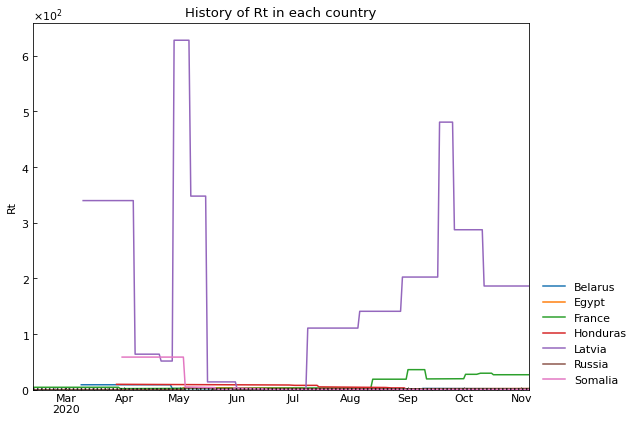

Country,Belarus,Egypt,France,Honduras,Latvia,Russia,Somalia
Date,,,,,,,
2020-11-01,1.58,1.91,26.89,1.15,186.26,2.05,0.0
2020-11-02,1.58,1.91,26.89,1.15,186.26,2.05,0.0
2020-11-03,1.58,1.91,26.89,1.15,186.26,2.05,0.0
2020-11-04,1.58,1.91,26.89,1.15,186.26,2.05,0.0
2020-11-05,1.58,1.91,26.89,1.15,186.26,2.05,0.0


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

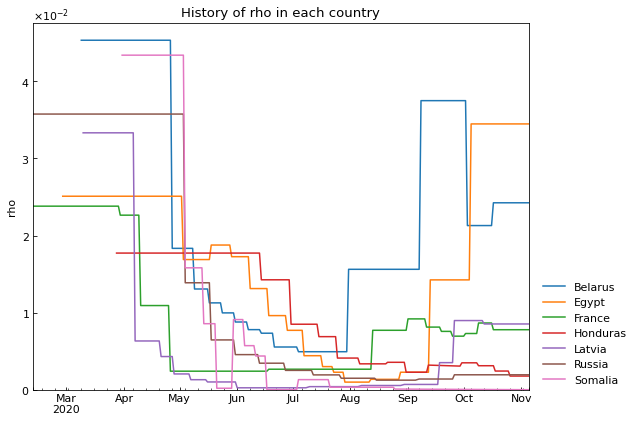

Country,Belarus,Egypt,France,Honduras,Latvia,Russia,Somalia
Date,,,,,,,
2020-11-01,0.024243,0.034473,0.00778,0.001769,0.008526,0.001934,0.0
2020-11-02,0.024243,0.034473,0.00778,0.001769,0.008526,0.001934,0.0
2020-11-03,0.024243,0.034473,0.00778,0.001769,0.008526,0.001934,0.0
2020-11-04,0.024243,0.034473,0.00778,0.001769,0.008526,0.001934,0.0
2020-11-05,0.024243,0.034473,0.00778,0.001769,0.008526,0.001934,0.0


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

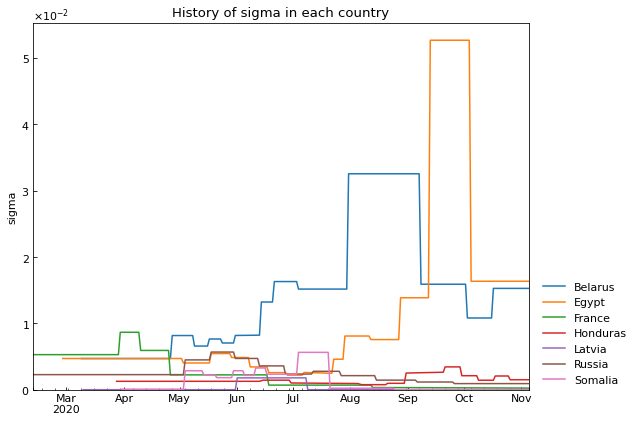

Country,Belarus,Egypt,France,Honduras,Latvia,Russia,Somalia
Date,,,,,,,
2020-11-01,0.015262,0.016335,0.000243,0.001501,0.0,0.000918,0.0
2020-11-02,0.015262,0.016335,0.000243,0.001501,0.0,0.000918,0.0
2020-11-03,0.015262,0.016335,0.000243,0.001501,0.0,0.000918,0.0
2020-11-04,0.015262,0.016335,0.000243,0.001501,0.0,0.000918,0.0
2020-11-05,0.015262,0.016335,0.000243,0.001501,0.0,0.000918,0.0


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

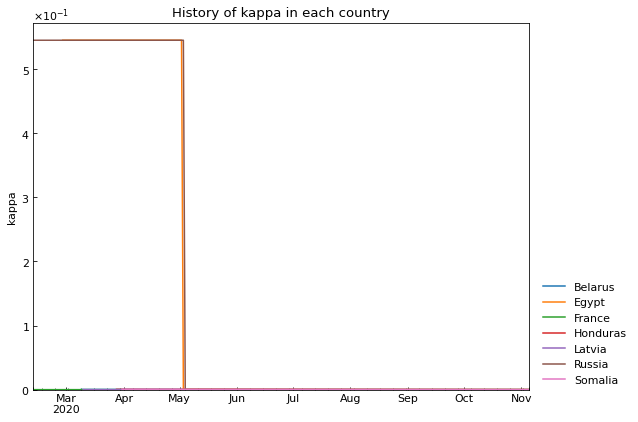

Country,Belarus,Egypt,France,Honduras,Latvia,Russia,Somalia
Date,,,,,,,
2020-11-01,0.000117,0.000318,0.000046,0.00001,0.000046,0.000025,0.000153
2020-11-02,0.000117,0.000318,0.000046,0.00001,0.000046,0.000025,0.000153
2020-11-03,0.000117,0.000318,0.000046,0.00001,0.000046,0.000025,0.000153
2020-11-04,0.000117,0.000318,0.000046,0.00001,0.000046,0.000025,0.000153
2020-11-05,0.000117,0.000318,0.000046,0.00001,0.000046,0.000025,0.000153


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

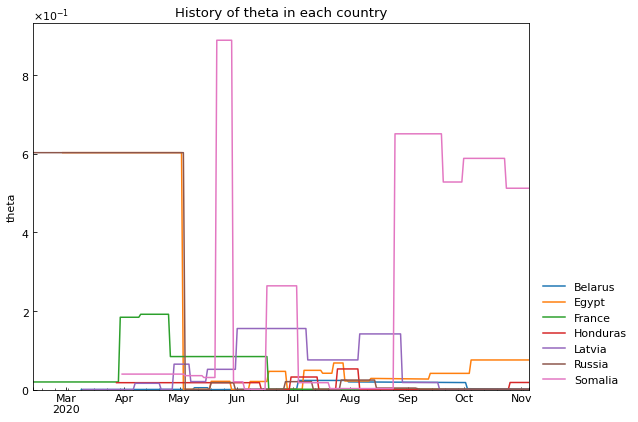

Country,Belarus,Egypt,France,Honduras,Latvia,Russia,Somalia
Date,,,,,,,
2020-11-01,0.000636,0.075587,0.001255,0.01836,0.001256,0.001357,0.512286
2020-11-02,0.000636,0.075587,0.001255,0.01836,0.001256,0.001357,0.512286
2020-11-03,0.000636,0.075587,0.001255,0.01836,0.001256,0.001357,0.512286
2020-11-04,0.000636,0.075587,0.001255,0.01836,0.001256,0.001357,0.512286
2020-11-05,0.000636,0.075587,0.001255,0.01836,0.001256,0.001357,0.512286


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59507 entries, 0 to 59590
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 59507 non-null  datetime64[ns]
 1   Country                              59507 non-null  object        
 2   Rt                                   59507 non-null  float64       
 3   theta                                59507 non-null  float64       
 4   kappa                                59507 non-null  float64       
 5   rho                                  59507 non-null  float64       
 6   sigma                                59507 non-null  float64       
 7   School_closing                       59507 non-null  int64         
 8   Workplace_closing                    59507 non-null  int64         
 9   Cancel_events                        59507 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.259458,-0.233120,0.034921,-0.411150,-0.334226,-0.265102,-0.155950,-0.245651,0.252860,-0.357139,-0.197507,-0.118738,0.020020,-0.219637,-0.319297,-0.228357
theta,-0.259458,1.000000,0.956339,0.674774,0.148138,-0.204888,-0.212922,-0.219598,-0.332841,-0.421294,-0.144231,-0.098803,0.142698,-0.411882,-0.190817,-0.050410,0.018551
kappa,-0.233120,0.956339,1.000000,0.762099,0.143594,-0.197662,-0.204522,-0.152379,-0.266787,-0.502667,-0.095816,-0.113712,0.221738,-0.449360,-0.205437,-0.092401,0.019284
rho,0.034921,0.674774,0.762099,1.000000,0.184807,-0.350258,-0.377677,-0.149412,-0.282149,-0.548446,-0.234166,-0.047827,0.161495,-0.551085,-0.466514,-0.414455,-0.044792
sigma,-0.411150,0.148138,0.143594,0.184807,1.000000,0.150849,0.133416,0.148453,0.103869,-0.433386,0.210564,0.128793,0.153409,-0.135051,0.056337,0.093985,0.242766
School_closing,-0.334226,-0.204888,-0.197662,-0.350258,0.150849,1.000000,0.926257,0.816739,0.787504,0.010239,0.900480,0.066542,0.453554,0.681420,0.412898,0.546231,0.756658
Workplace_closing,-0.265102,-0.212922,-0.204522,-0.377677,0.133416,0.926257,1.000000,0.799108,0.777845,0.031713,0.901504,-0.027194,0.398722,0.682825,0.460889,0.567399,0.738748
Cancel_events,-0.155950,-0.219598,-0.152379,-0.149412,0.148453,0.816739,0.799108,1.000000,0.768726,-0.044479,0.812693,0.123914,0.627122,0.650743,0.204454,0.337490,0.799535
Gatherings_restrictions,-0.245651,-0.332841,-0.266787,-0.282149,0.103869,0.787504,0.777845,0.768726,1.000000,0.019302,0.787768,0.173154,0.546457,0.576867,0.236159,0.288038,0.687523
Transport_closing,0.252860,-0.421294,-0.502667,-0.548446,-0.433386,0.010239,0.031713,-0.044479,0.019302,1.000000,-0.084733,0.255194,-0.271269,0.407404,0.046064,0.059692,-0.138161


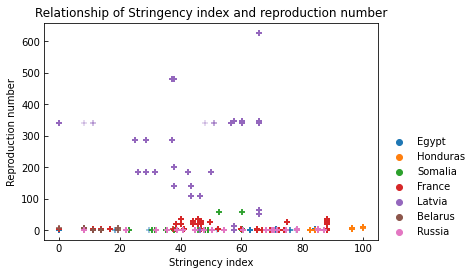

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()